In [1]:
import pandas as pd
import matplotlib
import seaborn as sns

In [2]:
prob = lambda d, pv, ev: d[(d.pv < .5) & (d.ev > 270)].shape[0] / d[d.ev > 270].shape[0]

In [3]:
d = pd.read_csv('538/election-forecasts-2020/presidential_scenario_analysis_2020.csv')

AB = 'Biden wins popular vote but loses Electoral College'
B = 'Trump majority (at least 50 percent of the vote)'

pab = d[d.scenario_description == AB]
pb = d[d.scenario_description == B]

p = pab.reset_index().probability / pb.reset_index().probability
p.iloc[52:].describe()

count    47.000000
mean      0.665504
std       0.054782
min       0.544298
25%       0.611949
50%       0.682146
75%       0.707153
max       0.753880
Name: probability, dtype: float64

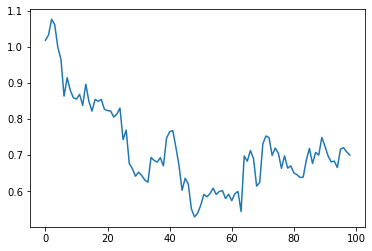

In [4]:
p.plot()

In [5]:
p538 = p.iloc[-30:].mean()

In [6]:
d = pd.read_csv('economist/output/site_data/electoral_college_simulations.csv')
pecon = d[(d.natl_pop_vote > 1/2) & (d.dem_ev < 270)].shape[0] / d[d.dem_ev < 270].shape[0]

In [8]:
print("Arithmetic mean: {:.2f}%".format(100*(pecon+p538)*.5))
print("Geometric mean: {:.2f}%".format(100*(pecon*p538)**(.5)))

Arithmetic mean: 73.48%
Geometric mean: 73.37%


In [9]:
d = pd.read_csv('538/election-forecasts-2020/presidential_scenario_analysis_2020.csv')
d

,cycle,branch,model,modeldate,candidate_inc,candidate_chal,candidate_3rd,scenario_id,probability,scenario_description,timestamp,simulations
0,2020,President,polls-plus,9/7/2020,Trump,Biden,NaN,9,0.779150,Biden majority (at least 50 percent of the vote),21:01:02 7 Sep 2020,40000
1,2020,President,polls-plus,9/7/2020,Trump,Biden,NaN,8,0.121150,Trump majority (at least 50 percent of the vote),21:01:02 7 Sep 2020,40000
2,2020,President,polls-plus,9/7/2020,Trump,Biden,NaN,6,0.123463,Biden wins popular vote but loses Electoral Co...,21:01:02 7 Sep 2020,40000
3,2020,President,polls-plus,9/7/2020,Trump,Biden,NaN,5,0.001138,Trump wins popular vote but loses Electoral Co...,21:01:02 7 Sep 2020,40000
4,2020,President,polls-plus,9/7/2020,Trump,Biden,NaN,4,0.835025,Biden wins popular vote,21:01:02 7 Sep 2020,40000
...,...,...,...,...,...,...,...,...,...,...,...,...
1282,2020,President,polls-plus,6/1/2020,Trump,Biden,NaN,14,0.870625,Biden wins at least one state Trump won in 2016,11:53:49 10 Aug 2020,40000
1283,2020,President,polls-plus,6/1/2020,Trump,Biden,NaN,13,0.454350,Trump wins at least one state Clinton won in 2016,11:53:49 10 Aug 2020,40000
1284,2020,President,polls-plus,6/1/2020,Trump,Biden,NaN,12,0.000300,Map exactly the same as in 2016,11:53:49 10 Aug 2020,40000
1285,2020,President,polls-plus,6/1/2020,Trump,Biden,NaN,11,0.302025,Biden landslide (double-digit popular vote mar...,11:53:49 10 Aug 2020,40000


In [15]:
from scipy.special import beta

In [29]:
a = 1
b = 1
ys = [1, 0, 5] # failed predictions of the 538 model in 2008 (Indiana), 2012 (aced it), and 2016 (WI, MI, FL, PA, NC)
n = 50
ns = [50, 50, 50]
a_ = a + sum(ys)
b_ = b + sum(ns) - sum(ys)
k = 0

pmf = lambda k, n, a, b: n * beta(k+a, n-k+b) / beta(a, b)

pmf(0, n, a_, b_)

# TODO idk what im doing xd

6.516631428766764

In [44]:
from scipy.stats import beta as beta_dist
from scipy.stats import bernoulli

N = int(1e4)
ps = beta_dist(a_, b_).rvs(size=N)
f = sum(bernoulli(p).rvs() for p in ps) / N
print("Ace probability: {:.2f}%".format(100*f))

Ace probability: 4.42%
